# Mineração Estatística de Dados:
# Projeto 1: Pré-processamento de dados e classificação

- ### Juan Carlos Elias Obando Valdivia (nro USP:7487156)

 - ### Alexandre Batistellas Bellas (nro USP:9763168)

## 1 –Considere a base de dados (arquivo dataset_5secondWindow%5B1%5D.csv):
## https://www.kaggle.com/fschwartzer/tmd-dataset-5-seconds-sliding-window

## 2 –Realize o pré-processamento dos dados: Verifque se há NaN ou outros erros no dados. Selecioneapenas os atributos relevantes e numéricos.

### Leitura e pre-processamento dos dados

Vamos ler o conjunto de dados:

In [1]:
import random
random.seed(1)
# Pandas is used for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#CSV file
features = pd.read_csv("data/dataset_5secondWindow%5B1%5D.csv", header=(0))
print(features.shape)
features.head(10)

(5893, 14)


,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.gyroscope#mean,android.sensor.gyroscope#min,android.sensor.gyroscope#max,android.sensor.gyroscope#std,sound#mean,sound#min,sound#max,sound#std,target
0,78.0,9.811476,9.758895,9.849411,0.014626,0.001651,0.000000,0.003533,0.000737,0.000000,0.000000,0.000000,0.000000,Still
1,145.0,9.939207,7.707437,17.146631,1.775944,0.036326,0.011669,0.059388,0.020290,89.200210,89.065143,89.335277,0.191013,Car
2,150.0,9.827178,9.804817,9.849262,0.011199,0.001525,0.000000,0.002609,0.000713,0.000000,0.000000,0.000000,0.000000,Still
3,105.0,9.673039,7.659674,12.304298,0.862553,0.036440,0.020463,0.052512,0.010553,87.470377,87.470377,87.470377,2.284186,Car
4,77.0,9.993466,8.965621,10.891645,0.504117,0.183202,0.020667,0.380875,0.098819,89.770732,89.770732,89.770732,0.006389,Car
5,559.0,9.330482,9.149029,9.520044,0.103857,0.000000,0.000000,0.000000,0.000000,57.361127,57.361127,57.361127,1.006611,Car
6,41.0,9.789771,9.758751,9.816197,0.013489,0.004100,0.002732,0.006579,0.001801,65.158369,65.158369,65.158369,0.000000,Train
7,20.0,9.906011,6.431646,14.202603,1.044684,0.140902,0.006567,0.690414,0.119667,0.000000,0.000000,0.000000,0.000000,Bus
8,35.0,9.639711,8.996134,10.027802,0.255053,0.041554,0.008014,0.123026,0.030074,89.808441,89.808441,89.808441,0.010171,Bus
9,27.0,9.602109,9.014786,10.068528,0.267791,0.037451,0.007174,0.084820,0.021391,89.815738,89.815738,89.815738,0.004995,Train


Primeiramente, vamos remover os "NaN" do arquivo, apagando as linhas que contém esse problema:

In [2]:
features = features.dropna()
print(features.shape)

(5893, 14)


Vamos remover as linhas duplicadas:

In [3]:
features.duplicated()
features = features.drop_duplicates()
print(features.shape)

(5893, 14)


Vamos remover as linhas com "?" ou qualquer outro caracter que indique um erro ou entrada faltante.
Primeiramente, convertemos essas entradas para "NaN":

In [4]:
features = features.replace('?', np.nan)
features = features.dropna()
print(features.shape)

(5893, 14)


In [5]:
classes = pd.unique(features[features.columns[-1]]) #name of the classes
classes = np.array(classes, dtype=str) #convert on array
print("Classes únicas no conjunto de dados:", classes)
list_labels = list(features.columns)
print("\nNomes dos atributos e classe:",list_labels)

Classes únicas no conjunto de dados: ['Still' 'Car' 'Train' 'Bus' 'Walking']

Nomes dos atributos e classe: ['time', 'android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std', 'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min', 'android.sensor.gyroscope#max', 'android.sensor.gyroscope#std', 'sound#mean', 'sound#min', 'sound#max', 'sound#std', 'target']


Vamos construir as variáveis X e Y, sendo que o processo classificação se resume em estimar a função f na relação Y=f(X)+ϵ, onde ϵ é o erro, que tem distribuição normal com média igual a zero e variância σ^2.

In [6]:
Y = np.array(features[list_labels[-1]], dtype=str)
#Convert to numpy array
X = np.array(features)
#Remove the labels from the features
#axis 1 refers to the columns
features = features.drop(list_labels[-1], axis = 1)
features.head(10)

,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.gyroscope#mean,android.sensor.gyroscope#min,android.sensor.gyroscope#max,android.sensor.gyroscope#std,sound#mean,sound#min,sound#max,sound#std
0,78.0,9.811476,9.758895,9.849411,0.014626,0.001651,0.000000,0.003533,0.000737,0.000000,0.000000,0.000000,0.000000
1,145.0,9.939207,7.707437,17.146631,1.775944,0.036326,0.011669,0.059388,0.020290,89.200210,89.065143,89.335277,0.191013
2,150.0,9.827178,9.804817,9.849262,0.011199,0.001525,0.000000,0.002609,0.000713,0.000000,0.000000,0.000000,0.000000
3,105.0,9.673039,7.659674,12.304298,0.862553,0.036440,0.020463,0.052512,0.010553,87.470377,87.470377,87.470377,2.284186
4,77.0,9.993466,8.965621,10.891645,0.504117,0.183202,0.020667,0.380875,0.098819,89.770732,89.770732,89.770732,0.006389
5,559.0,9.330482,9.149029,9.520044,0.103857,0.000000,0.000000,0.000000,0.000000,57.361127,57.361127,57.361127,1.006611
6,41.0,9.789771,9.758751,9.816197,0.013489,0.004100,0.002732,0.006579,0.001801,65.158369,65.158369,65.158369,0.000000
7,20.0,9.906011,6.431646,14.202603,1.044684,0.140902,0.006567,0.690414,0.119667,0.000000,0.000000,0.000000,0.000000
8,35.0,9.639711,8.996134,10.027802,0.255053,0.041554,0.008014,0.123026,0.030074,89.808441,89.808441,89.808441,0.010171
9,27.0,9.602109,9.014786,10.068528,0.267791,0.037451,0.007174,0.084820,0.021391,89.815738,89.815738,89.815738,0.004995


Verificando o balanceamento das classes:

In [7]:
cl = np.unique(Y)
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = Y == cl[i]
    ncl[i] = len(Y[a])
print(ncl)

[1178. 1180. 1179. 1179. 1177.]


In [8]:
#Saving feature names for later use
feature_list = list(features.columns)
print(feature_list)

['time', 'android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std', 'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min', 'android.sensor.gyroscope#max', 'android.sensor.gyroscope#std', 'sound#mean', 'sound#min', 'sound#max', 'sound#std']


In [9]:
#Convert to numpy array
X = np.array(features)
print(X)

[[7.80000000e+01 9.81147629e+00 9.75889547e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.45000000e+02 9.93920678e+00 7.70743742e+00 ... 8.90651433e+01
  8.93352770e+01 1.91013358e-01]
 [1.50000000e+02 9.82717784e+00 9.80481713e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [8.60000000e+01 9.81289280e+00 9.77288064e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.99000000e+02 9.83114379e+00 9.80734673e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.50000000e+01 1.10510094e+01 5.20328477e+00 ... 8.97124413e+01
  8.97124413e+01 6.39984580e-03]]


### Conjuntos de teste e treinamento

Para treinar o classificador, precisamos definir o conjunto de teste e treinamento.

In [10]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
p = 0.7
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 42)

A partir desses dados, podemos realizar o processo de classificação.

## 3  -No caso do classificador Knn, verifique o efeito do parâmetro k na classificação.


### k-vizinhos

Podemos realizar a classificação usando a biblioteca scikit-learn (https://scikit-learn.org). As métricas possíveis podem ser vistas em: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

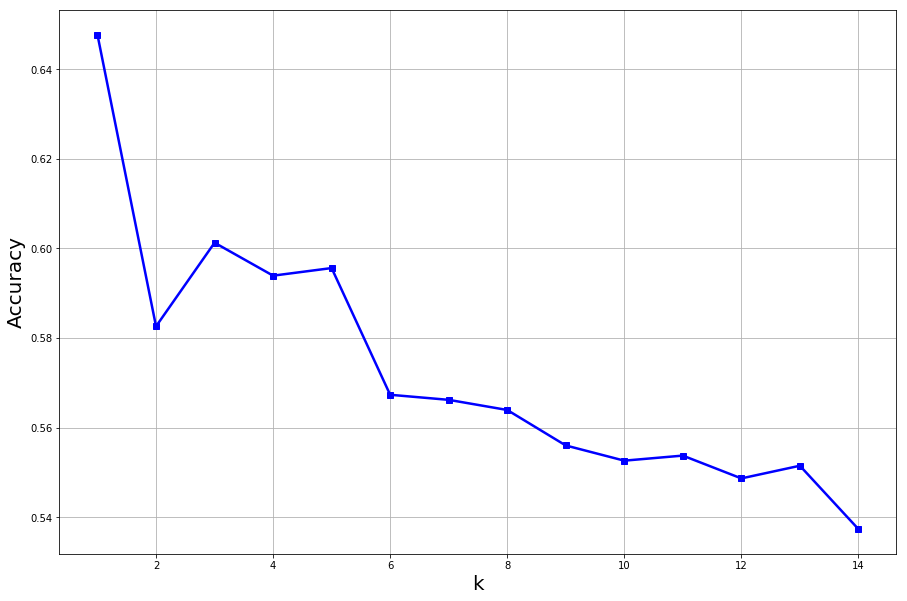

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

vscore = []
vk = []
for k in np.arange(1, 15):
    model = KNeighborsClassifier(n_neighbors=k)
    # Train the model using the training sets
    model.fit(train_x,train_y)
    #Predict Output
    pred_y= model.predict(test_x)
    score = accuracy_score(pred_y, test_y)
    vscore.append(score)
    vk.append(k)
plt.figure(figsize=(15,10))
plt.plot(vk, vscore, marker='s', linestyle='-', color="blue", linewidth=2.5)
plt.xlabel("k", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.grid(True)
plt.show(True)

## 4 – Compare	os	classificadores:
- ### knn (melhor	k	observado	no	item	anterior)
- ### Decisão	Bayesiana
- ### Naive	Bayes

### Classificador Bayesiano

Vamos considerar o caso paramétrico, assumindo que cada variável está distribuída de acordo com uma distribuição Normal.

Já selecionamos os conjuntos de treinamento e teste. No conjunto de treinamento, vamos calcular a média e desvio padrão de cada atributo para cada classe. A seguir, reaizamos a classificação, dos dados usando a teoria da decisão Bayesiana, isto é: X∈Ci se, e somente se, P(Ci|X)=maxP(Cj|X) para todo j.

In [12]:
from scipy.stats import multivariate_normal
#matrix to store the probabilities
P = pd.DataFrame(data=np.zeros((train_x.shape[0], len(classes))), columns= classes)

In [13]:
for i in np.arange(0, len(classes)):
    #elements tem todos os identificadores dos exemplos do conjunto de treinamento cujo rótulo é classe[i] 
    elements = tuple(np.where(train_y == classes[i]))
    #Z contém todos os exemplos do conjunto de treinamento cujo rótulo é classe[i]
    Z = train_x[elements,:][0]
    #calcula a média por coluna(axis = 0)
    m = np.mean(Z, axis = 0)
    #calcula a covariancia da transposta de Z
    cv = np.cov(np.transpose(Z))
    #para cada exemplo do conjunto de teste
    for j in np.arange(0, test_x.shape[0]):
        #pega cada exemplo do conjunto de teste(todos os atributos)
        x = test_x[j,:]
        # probability density function for multivariate_normal is
        #f(x) = \frac{1}{\sqrt{(2 \pi)^k \det \Sigma}} \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right),
        pj = multivariate_normal.pdf(x, mean=m, cov=cv)
        P[classes[i]][j] = pj

In [14]:
pred_y = []
#np.array(test_x.shape[0], dtype=str)
#para cada exemplo do conjunto de teste 
for i in np.arange(0, test_x.shape[0]):
    #pegar o identificador da coluna com maior probabilidade de cada exemplo
    c = np.argmax(np.array(P.iloc[[i]]))
    pred_y.append(classes[c])
pred_y = np.array(pred_y, dtype=str)

In [15]:
from sklearn.metrics import accuracy_score
score_bayes = accuracy_score(pred_y, test_y)

## Naive Bayes

Vamos considerar a biblioteca scikit-learn.

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
pred_y = gnb.predict(test_x)
score_GNB = accuracy_score(pred_y, test_y)

A matriz de confusão:

In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_y, pred_y))

[[104  42  28 120  14]
 [ 32 110  40 160  14]
 [  7   5 189 167  12]
 [  5  15  37 276   8]
 [ 26  17   5  28 307]]


In [19]:
print("Acurácias:\n")
print("\tKNN para k = 1: \t\t%.4f" % vscore[0])
print("\tDecisão Bayesiana: \t\t%.4f" % score_bayes)
print("\tNaive Bayes: \t\t\t%.4f"% score_GNB)

Acurácias:

	KNN para k = 1: 		0.6476
	Decisão Bayesiana: 		0.6029
	Naive Bayes: 			0.5577


## 5 – Verifique	o	efeito	da	normalização	(atributos	em	[0,1])	e	padronização (atributos	com	média	0	e	variância	1)	dos	dados.	Compare	os	casos	sem	processamento,	com	padronização	e	com	normalização	para	os	classificadores:
- ### knn	(melhor	k	observado	no	item	anterior)
- ### Decisão	Bayesiana
- ### Naive	Bayes

In [20]:
#Bibliotecas para normalização e padronização
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### k-vizinhos

In [21]:
def acuraciaKnnValor(features, tipo=0, p=0.7, metric='euclidean', k=1, dist=2): #tipo: 0 sem processamento, 1 com padronização, 2 com normalização
    legend = "sem processamento"
    
    X = np.array(features, dtype=float)
    #se quisermos a acurácia com padronização 
    if tipo == 1:
        scaler = StandardScaler().fit(X)
        X = scaler.transform(X)
        legend = "com padronização"
    if tipo == 2:
        scaler = MinMaxScaler(feature_range=(0,1))
        scaler.fit(X)
        X = scaler.transform(X)
        legend = "com normalização"
        
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=1-p, random_state=42)
    
    model = KNeighborsClassifier(n_neighbors=k, p=dist, metric=metric)
    # Train the model using the training sets
    model.fit(train_x,train_y)
    #Predict Output
    pred_y = model.predict(test_x) 
    score = accuracy_score(pred_y, test_y)
    return score

print('Acurácia sem processamento:\t', acuraciaKnnValor(features, tipo=0))
print('Acurácia com padronização:\t', acuraciaKnnValor(features, tipo=1))
print('Acurácia com normalização:\t',acuraciaKnnValor(features, tipo=2))

Acurácia sem processamento:	 0.6476244343891403
Acurácia com padronização:	 0.8433257918552036
Acurácia com normalização:	 0.8076923076923077


### Classificador Bayesiano

In [22]:
def acuraciaBayesValor(features, tipo=0, p=0.7): #tipo: 0 sem processamento, 1 com padronização, 2 com normalização
    legend = "sem processamento"
    X = np.array(features, dtype=float)
    if tipo == 1:
        scaler = StandardScaler().fit(X)
        X = scaler.transform(X)
        legend = "com padronização"
    
    if tipo == 2:
        scaler = MinMaxScaler(feature_range=(0,1))
        scaler.fit(X)
        X = scaler.transform(X)
        legend = "com normalização"
    
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=1-p, random_state=42)
    P = pd.DataFrame(data=np.zeros((test_x.shape[0], len(classes))), columns = classes)
    for i in np.arange(0, len(classes)):
        elements = tuple(np.where(train_y == classes[i]))
        Z = train_x[elements,:][0]
        m = np.mean(Z, axis = 0)
        cv = np.cov(np.transpose(Z))
        for j in np.arange(0,test_x.shape[0]):
            x = test_x[j,:]
            pj = multivariate_normal.pdf(x, mean=m, cov=cv)
            P[classes[i]][j] = pj
    
    pred_y = []
    for i in np.arange(0, test_x.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        pred_y.append(classes[c])
    pred_y = np.array(pred_y, dtype=str)
    
    score = accuracy_score(pred_y, test_y)
    return score

print('Acurácia sem processamento:\t', acuraciaBayesValor(features, tipo=0))
print('Acurácia com padronização:\t', acuraciaBayesValor(features, tipo=1))
print('Acurácia com normalização:\t', acuraciaBayesValor(features, tipo=2))


Acurácia sem processamento:	 0.6029411764705882
Acurácia com padronização:	 0.6029411764705882
Acurácia com normalização:	 0.6029411764705882


### Naive Bayes

In [23]:
def acuraciaNaiveBayesValor(features, tipo=0, p=0.7): #tipo: 0 sem processamento, 1 com padronização, 2 com normalização
    legend = "sem processamento"
    
    X = np.array(features, dtype=float)
    if tipo == 1:
        scaler = StandardScaler().fit(X)
        X = scaler.transform(X)
        legend = "com padronização"
    
    if tipo == 2:
        scaler = MinMaxScaler(feature_range=(0,1))
        scaler.fit(X)
        X = scaler.transform(X)
        legend = "com normalização" 
    
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=1-p, random_state=42)
    gnb = GaussianNB()
    gnb.fit(train_x, train_y)
    
    pred_y = gnb.predict(test_x)
    score = accuracy_score(pred_y, test_y)
    return score

print('Acurácia sem processamento:\t', acuraciaNaiveBayesValor(features, tipo=0))
print('Acurácia com padronização:\t', acuraciaNaiveBayesValor(features, tipo=1))
print('Acurácia com normalização:\t', acuraciaNaiveBayesValor(features, tipo=2))

Acurácia sem processamento:	 0.5576923076923077
Acurácia com padronização:	 0.5576923076923077
Acurácia com normalização:	 0.5576923076923077


## 6 –Mostre a matriz de correlação entre os atributos. Considere os atributos com menor correlação (por exemplo, menor do que 0.5). Realize a classificação novamente apenas com esses atributos. A acurácia melhora?

A matriz de correlação entre as variáveis:

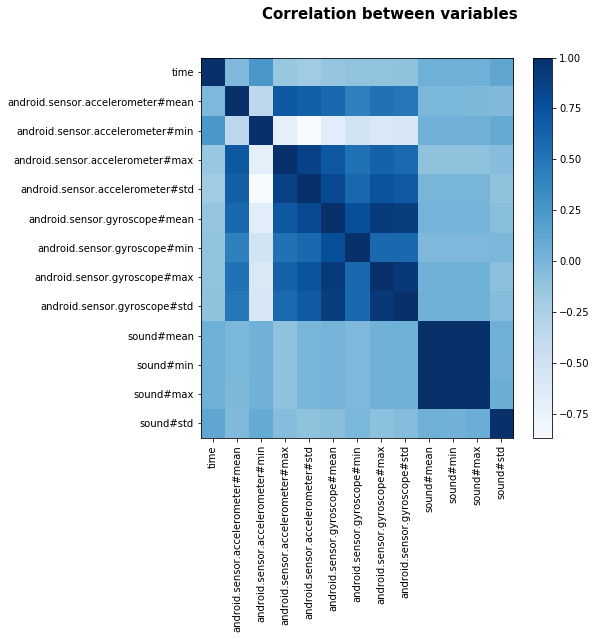

In [24]:
corr = features.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(7,7))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

In [25]:
print(corr)

                                       time  \
time                               1.000000   
android.sensor.accelerometer#mean -0.029051   
android.sensor.accelerometer#min   0.251470   
android.sensor.accelerometer#max  -0.146154   
android.sensor.accelerometer#std  -0.186240   
android.sensor.gyroscope#mean     -0.126482   
android.sensor.gyroscope#min      -0.112654   
android.sensor.gyroscope#max      -0.113816   
android.sensor.gyroscope#std      -0.108338   
sound#mean                         0.044498   
sound#min                          0.045076   
sound#max                          0.044202   
sound#std                          0.124252   

                                   android.sensor.accelerometer#mean  \
time                                                       -0.029051   
android.sensor.accelerometer#mean                           1.000000   
android.sensor.accelerometer#min                           -0.350705   
android.sensor.accelerometer#max                     

Assim, para identificarmos as variáveis correlacionadas, usamos um laço for:

In [26]:
p = 0.5
var = []
for i in corr.columns:
    for j in corr.columns:
        if(i != j):
            if np.abs(corr[i][j]) < p:
                var.append([i, j])
print('Variáveis com correlação menor que 0.5:\n', var)

Variáveis com correlação menor que 0.5:
 [['time', 'android.sensor.accelerometer#mean'], ['time', 'android.sensor.accelerometer#min'], ['time', 'android.sensor.accelerometer#max'], ['time', 'android.sensor.accelerometer#std'], ['time', 'android.sensor.gyroscope#mean'], ['time', 'android.sensor.gyroscope#min'], ['time', 'android.sensor.gyroscope#max'], ['time', 'android.sensor.gyroscope#std'], ['time', 'sound#mean'], ['time', 'sound#min'], ['time', 'sound#max'], ['time', 'sound#std'], ['android.sensor.accelerometer#mean', 'time'], ['android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min'], ['android.sensor.accelerometer#mean', 'android.sensor.gyroscope#min'], ['android.sensor.accelerometer#mean', 'android.sensor.gyroscope#std'], ['android.sensor.accelerometer#mean', 'sound#mean'], ['android.sensor.accelerometer#mean', 'sound#min'], ['android.sensor.accelerometer#mean', 'sound#max'], ['android.sensor.accelerometer#mean', 'sound#std'], ['android.sensor.accelerometer#min', '

## 7	– Verifique	qual	dos	classificadores	é	mais	robusto	com	relação	à	presença	de ruídos.	Para	isso:	
- ### Aplique	a	normalização	dos	dados	para	que	os	atributos	apresentem	média	igual	a	zero	e	variância	igual	a	1.
- ### Inclua	em	X%	dos	atributos,	um	valor	normalmente	distribuído	com	média	zero	e	variância	1.	Considere	toda	a	matriz	dos	dados,	sorteando uma	posição	da	matriz	de	forma	aleatória.
- ### Varie	o	nível	de	ruído,	de	0	a	50%	(em	passos	de	5%)	e	avalie	como	muda	a	classificação.	Construa	um	gráfico	de	X% de	ruído versus	porcentagem	de	classificação	correta.	Coloque	a	média	e	o	desvio	padrão	calculados	a	partir	de	ao	menos	10	simulações.	Considere	70%	dos	dados	no	conjunto	de	treinamento.
- ### Discuta os	resultados.

## 8 –No caso do classificador Naive Bayes, é possível considerar diferentes funções para estimar as probabilidades. Compare os casos: (i) Gaussian Naive Bayes, (ii) multinomial Naive Bayese (iii)Bernoulli Naive Bayes. Considere os casos com e sem padronização.

In [27]:
from sklearn.naive_bayes import MultinomialNB
def acuraciaMultinomialNaiveBayesValor(features, tipo=0, p=0.7): #tipo: 0 sem processamento, 1 com padronização, 2 com normalização
    legend = "sem processamento"
    
    X = np.array(features, dtype=float)
    if tipo == 1:
        scaler = StandardScaler().fit(X)
        X = scaler.transform(X)
        legend = "com padronização"
    
    if tipo == 2:
        scaler = MinMaxScaler(feature_range=(0,1))
        scaler.fit(X)
        X = scaler.transform(X)
        legend = "com normalização" 
    
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=1-p, random_state=42)
    mnb = MultinomialNB()
    mnb.fit(train_x, train_y)
    pred_y = mnb.predict(test_x)
    score_MNB = accuracy_score(pred_y, test_y)
    return score

In [28]:
from sklearn.naive_bayes import BernoulliNB
def acuraciaBernoulliNaiveBayesValor(features, tipo=0, p=0.7): #tipo: 0 sem processamento, 1 com padronização, 2 com normalização
    legend = "sem processamento"
    
    X = np.array(features, dtype=float)
    if tipo == 1:
        scaler = StandardScaler().fit(X)
        X = scaler.transform(X)
        legend = "com padronização"
    
    if tipo == 2:
        scaler = MinMaxScaler(feature_range=(0,1))
        scaler.fit(X)
        X = scaler.transform(X)
        legend = "com normalização" 
    
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=1-p, random_state=42)
    bnb = BernoulliNB()
    bnb.fit(train_x, train_y)
    pred_y = bnb.predict(test_x)
    score_BNB = accuracy_score(pred_y, test_y)
    return score

In [29]:
def acuraciaMultinomialNaiveBayesValor(features, tipo=0, p=0.7): #tipo: 0 sem processamento, 1 com padronização, 2 com normalização
    legend = "sem processamento"
    
    X = np.array(features, dtype=float)
    if tipo == 1:
        scaler = StandardScaler().fit(X)
        X = scaler.transform(X)
        legend = "com padronização"
    
    if tipo == 2:
        scaler = MinMaxScaler(feature_range=(0,1))
        scaler.fit(X)
        X = scaler.transform(X)
        legend = "com normalização" 
    
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=1-p, random_state=42)
    mnb = MultinomialNB()
    mnb.fit(train_x, train_y)
    pred_y = mnb.predict(test_x)
    score_MNB = accuracy_score(pred_y, test_y)
    return score

In [30]:
print("Acurácias para o Naive Bayes sem padronização:\n")
print("\tGaussian Naive Bayes: \t%.4f" % acuraciaNaiveBayesValor(features, tipo=0, p=0.7))
print("\tMultinomial Naive Bayes: %.4f" % acuraciaMultinomialNaiveBayesValor(features, tipo=0, p=0.7))
print("\tBernoulli Naive Bayes: \t%.4f"% acuraciaBernoulliNaiveBayesValor(features, tipo=0, p=0.7))

Acurácias para o Naive Bayes sem padronização:

	Gaussian Naive Bayes: 	0.5577
	Multinomial Naive Bayes: 0.5373
	Bernoulli Naive Bayes: 	0.5373


In [31]:
print("Acurácias para o Naive Bayes com padronização:\n")
print("\tGaussian Naive Bayes: \t%.4f" % acuraciaNaiveBayesValor(features, tipo=1, p=0.7))
#MultinomialNB assumes that features have multinomial distribution which is a generalization of the binomial distribution. 
#Neither binomial nor multinomial distributions can contain negative values.
#print("\tMultinomial Naive Bayes: %.4f" % acuraciaMultinomialNaiveBayesValor(features, tipo=1, p=0.7))
print("\tBernoulli Naive Bayes: \t%.4f"% acuraciaBernoulliNaiveBayesValor(features, tipo=1, p=0.7))

Acurácias para o Naive Bayes com padronização:

	Gaussian Naive Bayes: 	0.5577
	Bernoulli Naive Bayes: 	0.5373


## 9 –No caso do Knn, compare as classificações usando diferentes métricas. Varie k e mostre as curvas (em um mesmo plot) para as distâncias euclidiana, Manhattan, Chebyshev e Minkowski (p=0.5, p=1.5, p = 3).

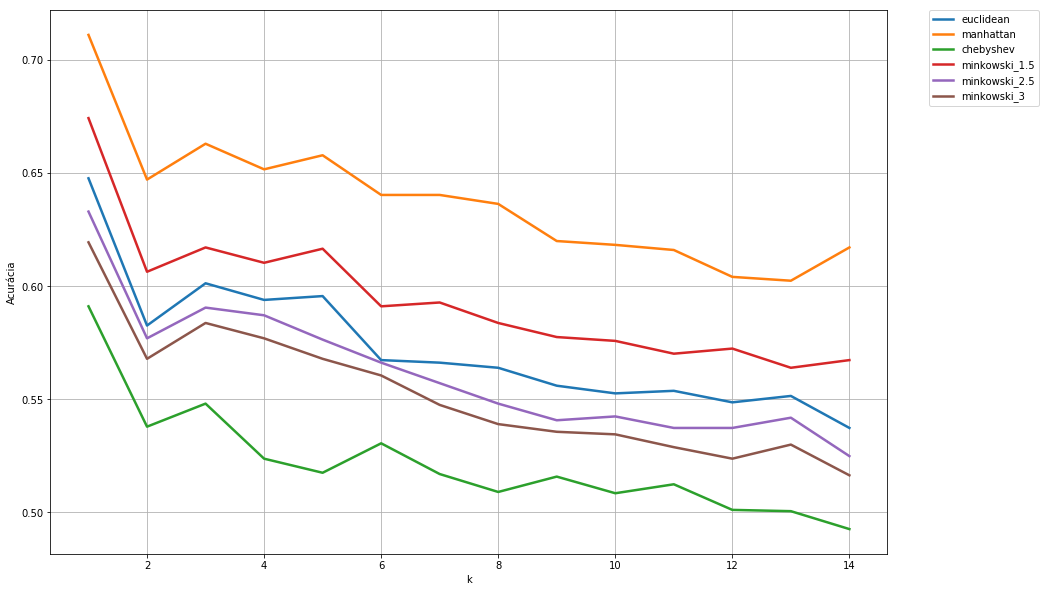

In [32]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.xlabel("k")
plt.ylabel("Acurácia")

dists = ['euclidean', 'manhattan', 'chebyshev']
for m in dists:
    acur = []
    k_list = []
    for k in range(1, 15):
        acur.append(acuraciaKnnValor(features, tipo=0, p=0.7, metric=m, k=k))
        k_list.append(k)
    plt.plot(k_list, acur, label=m, linewidth=2.5)

p_list = [1.5, 2.5, 3]
for p_valor in p_list:
    acur = []
    k_list = []
    for k in range(1, 15):
        acur.append(acuraciaKnnValor(features, tipo=0, p=0.7, metric='minkowski', k=k, dist=p_valor))
        k_list.append(k)
    plt.plot(k_list, acur, label='minkowski_'+str(p_valor), linewidth=2.5)    
    

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## 10	– Faça	um	gráfico	da	fração	de	elementos	no	conjunto	de	treinamento	(10%	até	90%	em	passos	de	10%)	versus	acurácia	para	os	classificadores:
- ### knn	(melhor	k	observado	anteriormente)
- ### Naive	Bayes
- ### Decisão	Bayesiana
## Considere os	casos com e sem padronização.

### k-vizinhos

Gráfico da acurácia em função da fração de elementos no conjunto de treinamento:


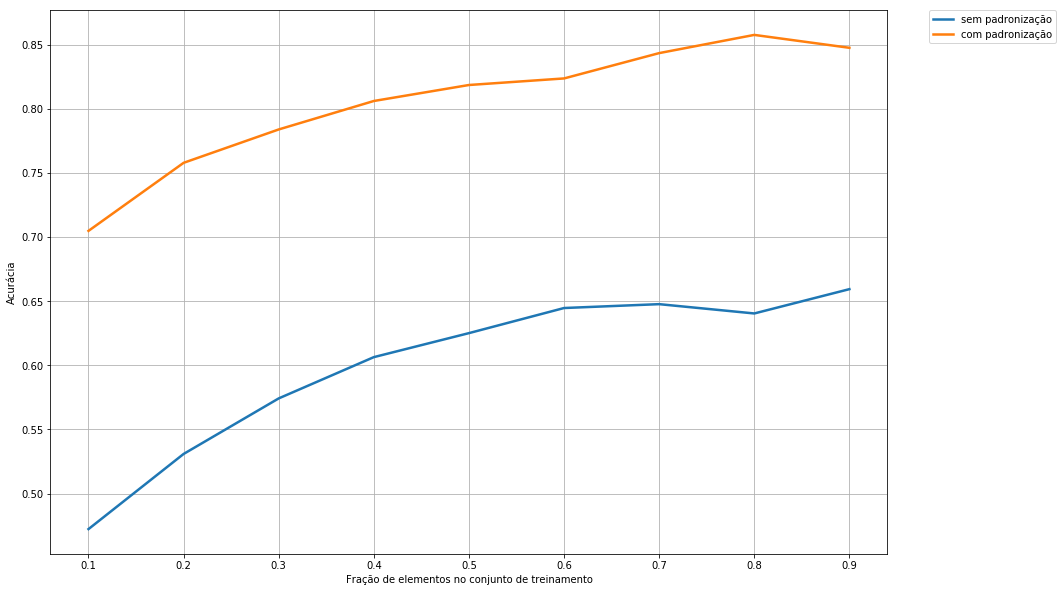

In [33]:
acuracia_sem = []
acuracia_com = []
list_p = []
for i in range(1, 10):
    list_p.append(i/10)
    acuracia_sem.append(acuraciaKnnValor(features, tipo=0, p=i/10, k=1))
    acuracia_com.append(acuraciaKnnValor(features, tipo=1, p=i/10, k=1))

print("Gráfico da acurácia em função da fração de elementos no conjunto de treinamento:")
plt.figure(figsize=(15,10))
plt.xlabel("Fração de elementos no conjunto de treinamento")
plt.ylabel("Acurácia")
plt.plot(list_p, acuracia_sem, label = 'sem padronização', linewidth=2.5)
plt.plot(list_p, acuracia_com, label = 'com padronização', linewidth=2.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)


### Classificador bayesiano

Gráfico da acurácia em função da fração de elementos no conjunto de treinamento:


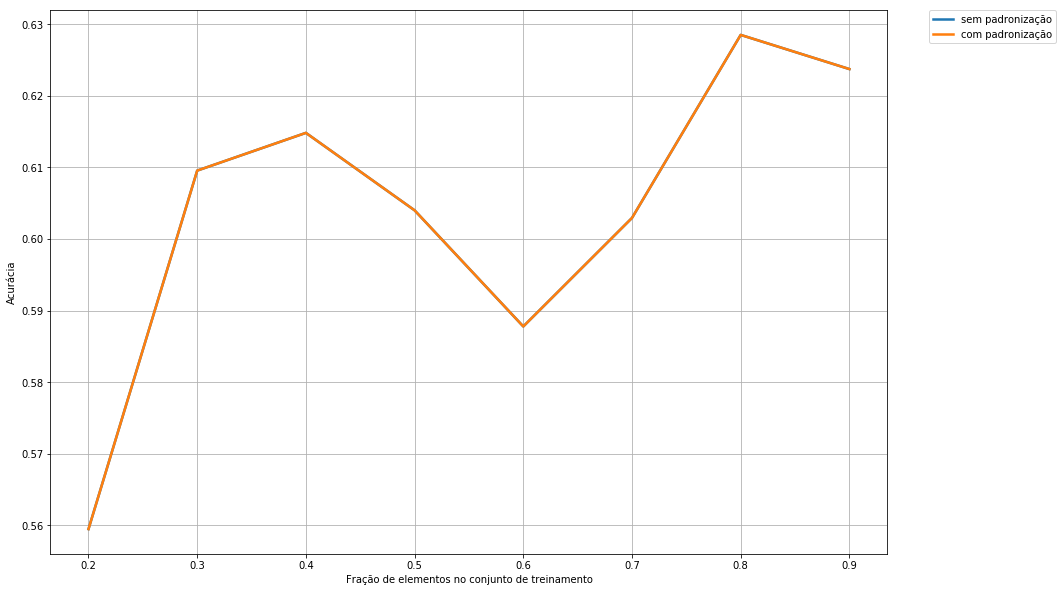

In [34]:
acuracia_sem = []
acuracia_com = []
list_p = []
#não funciona com 10% pois a matriz não é singular e dá erro com o método pdf
for i in range(2, 10):
    list_p.append(i/10)
    acuracia_sem.append(acuraciaBayesValor(features=features, tipo=0, p=i/10))
    acuracia_com.append(acuraciaBayesValor(features=features, tipo=1, p=i/10))
    
print("Gráfico da acurácia em função da fração de elementos no conjunto de treinamento:")
plt.figure(figsize=(15,10))
plt.xlabel("Fração de elementos no conjunto de treinamento")
plt.ylabel("Acurácia")
plt.plot(list_p, acuracia_sem, label = 'sem padronização', linewidth=2.5)
plt.plot(list_p, acuracia_com, label = 'com padronização', linewidth=2.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)

### Naive Bayes

Gráfico da acurácia em função da fração de elementos no conjunto de treinamento:


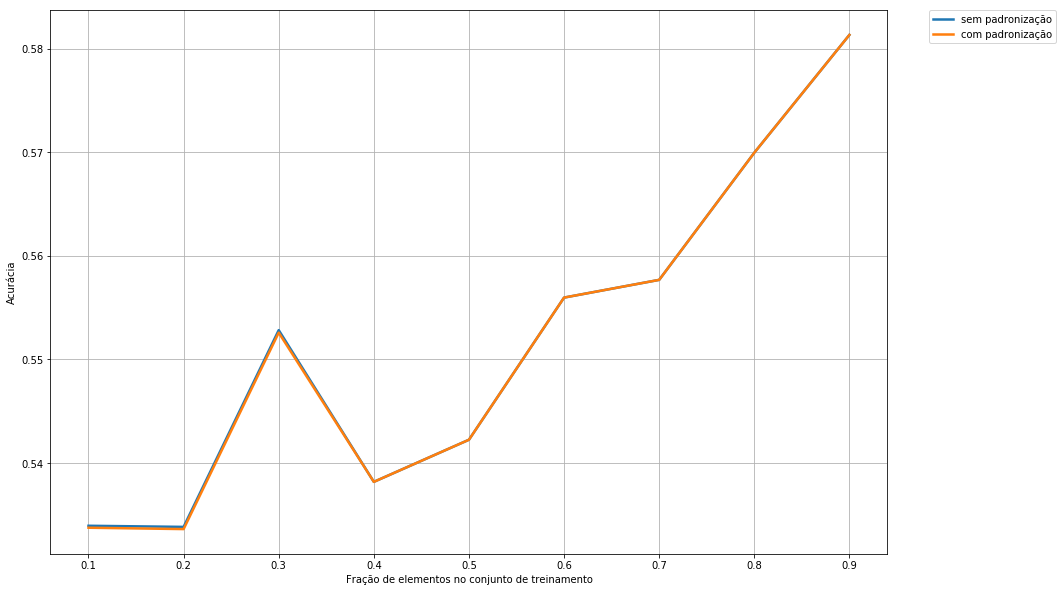

In [35]:
acuracia_sem = []
acuracia_com = []
list_p = []
for i in range(1, 10):
    list_p.append(i/10)
    acuracia_sem.append(acuraciaNaiveBayesValor(features=features, tipo=0, p=i/10))
    acuracia_com.append(acuraciaNaiveBayesValor(features=features, tipo=1, p=i/10))
    
print("Gráfico da acurácia em função da fração de elementos no conjunto de treinamento:")
plt.figure(figsize=(15,10))
plt.xlabel("Fração de elementos no conjunto de treinamento")
plt.ylabel("Acurácia")
plt.plot(list_p, acuracia_sem, label = 'sem padronização', linewidth=2.5)
plt.plot(list_p, acuracia_com, label = 'com padronização', linewidth=2.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)